In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


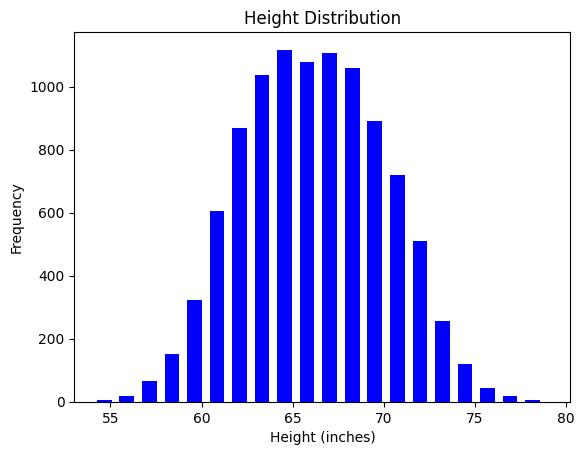

In [8]:
plt.hist(df['Height'], bins=20, color='blue' , width=0.8)
plt.title('Height Distribution')    
plt.xlabel('Height (inches)')           
plt.ylabel('Frequency')
plt.show()

In [10]:
df.Height.describe()


count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<br><br><br>

The Z-score is a measure of how many standard deviations ($\sigma$) a data point is away from the mean ($\mu$) of the dataset. 

It's primarily used to identify outliers.

Z-Score FormulaThe formula is simple:
$$Z = \frac{\text{Data Value} - \text{Mean}}{\text{Standard Deviation}} = \frac{x - \mu}{\sigma}$$

Removing Outliers

**1. Identify Outliers**

Data points are typically considered outliers if their absolute Z-score is greater than 3.
$$\text{Outlier if } |Z| > 3$$

This means the value is in the outer 0.3% of the data (assuming a normal distribution), or more than 3 standard deviations away from the mean.

**2. The Removal Process**

* To "remove" outliers using the Z-score:

* Calculate the mean ($\mu$) and standard deviation ($\sigma$) of your data.

* Convert every data point ($x$) into its Z-score ($Z$).

* Filter the data, keeping only the values where $-3 \le Z \le +3$.

* The values where $|Z| > 3$ are the outliers that are removed from the clean dataset.

In [11]:
df.Height.mean()

np.float64(66.36755975482124)

In [12]:
df.Height.std()

np.float64(3.847528120773229)

In [13]:
upper_limit = df.Height.mean() + 3*df.Height.std()
lower_limit = df.Height.mean() - 3*df.Height.std()  
upper_limit, lower_limit

(np.float64(77.91014411714093), np.float64(54.82497539250156))

In [15]:
df[(df.Height > upper_limit) | (df.Height < lower_limit)] 

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [18]:
df_no_outliers = df[(df.Height <= upper_limit) & (df.Height >= lower_limit)]    
df_no_outliers.shape

(9993, 3)

In [19]:
df.shape[0] - df_no_outliers.shape[0]

7

In [20]:
df['z_score'] = (df.Height - df.Height.mean())/df.Height.std()
df.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [22]:
df[df['z_score'] > 3]

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [24]:
df[df['z_score'] <- 3]

,Gender,Height,Weight,z_score
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [27]:
df_no_outlier = df[(df['z_score'] <=3) & (df['z_score'] >= -3)]
df_no_outlier.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [28]:
df.shape[0] - df_no_outlier.shape[0]

7